In [1]:
# load required packages
import folium
import rioxarray as rioxr
import os
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

In [2]:
## load sea level rise raster
# set slr file path using os
slr_fp = os.path.join(os.getcwd(), "data", "cosmosflooding_2080-2100_max_mosaic_sb.tif")

# load slr tif
slr = rioxr.open_rasterio(slr_fp)

In [3]:
print(slr.rio.bounds())

print(slr.rio.crs)

(705611.5292027931, 3758717.181713381, 875735.5292027931, 3884767.181713381)
EPSG:26910


In [4]:
slr

<xarray.DataArray (band: 1, y: 63025, x: 85062)>
[5361032550 values with dtype=int32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 7.056e+05 7.056e+05 ... 8.757e+05 8.757e+05
  * y            (y) float64 3.885e+06 3.885e+06 ... 3.759e+06 3.759e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  NEAREST
    _FillValue:          2147483647
    scale_factor:        1.0
    add_offset:          0.0

In [5]:
# drop single band
slr = slr.squeeze()
slr = slr.drop('band')

In [8]:
# create bounding box for slr
points = [[-119.7124749648828, 34.42596854805673],
          [-119.7124749648828, 34.3977044959655],
          [-119.66414116205618, 34.3977044959655],
          [-119.66414116205618, 34.42596854805673],
          [-119.7124749648828, 34.42596854805673]]

In [22]:
# create geodataframe of bounding box points
sb_waterfront = gpd.GeoDataFrame(geometry = [Polygon(points)],
                                 crs='epsg:4326')

sb_waterfront

,geometry
0,"POLYGON ((-119.71247 34.42597, -119.71247 34.3..."


In [23]:
sb_waterfront.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
# reproject bounding box
sb_waterfront = sb_waterfront.to_crs(slr.rio.crs)

In [27]:
#print(sb_waterfront.crs)

#print(slr.rio.crs)

print(sb_waterfront.total_bounds)
print(slr.rio.bounds())

[ 802132.28079791 3811155.73695247  806679.39865388 3814437.05989989]
(705611.5292027931, 3758717.181713381, 875735.5292027931, 3884767.181713381)


In [11]:
type(sb_waterfront)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:title={'center':'spatial_ref = 0'}, xlabel='x', ylabel='y'>

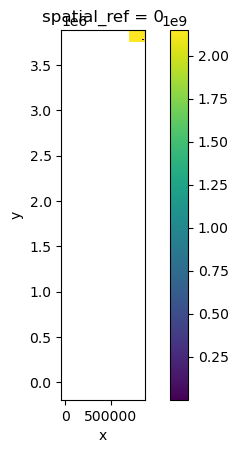

In [16]:
# plot the bounding box and the slr together
fig, ax = plt.subplots()
slr.plot.imshow(ax = ax)
sb_waterfront.plot(ax = ax,
                  alpha = .5)

In [15]:
# clip slr to santa barbara area
slr_small = slr.rio.clip_box(*sb_waterfront.total_bounds)

NoDataInBounds: No data found in bounds.

In [ ]:
# show the raster
plt.imshow(slr.values, cmap = 'viridis', extent = slr.rio.bounds())